In [146]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import scipy.stats as stats

In [147]:
CustomerData = pd.read_csv('marketing_campaign.csv')
CustomerData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [148]:
CustomerData['Dt_Customer'] = 2023 - pd.to_datetime(CustomerData['Dt_Customer'], format='%d/%m/%Y').dt.year
CustomerData = CustomerData.rename(columns={'Dt_Customer': 'DurationJoined'})
CustomerData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,11,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,9,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,10,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,9,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,9,94,173,...,5,0,0,0,0,0,0,3,11,0


In [149]:
NumericalCustomerData = CustomerData.select_dtypes(include=['int64', 'float64'])
NumericalCustomerData = NumericalCustomerData.drop(['Kidhome','Teenhome','Z_CostContact', 'Z_Revenue', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'ID', 'Recency','Response'], axis=1)
Response = pd.DataFrame(CustomerData["Response"])

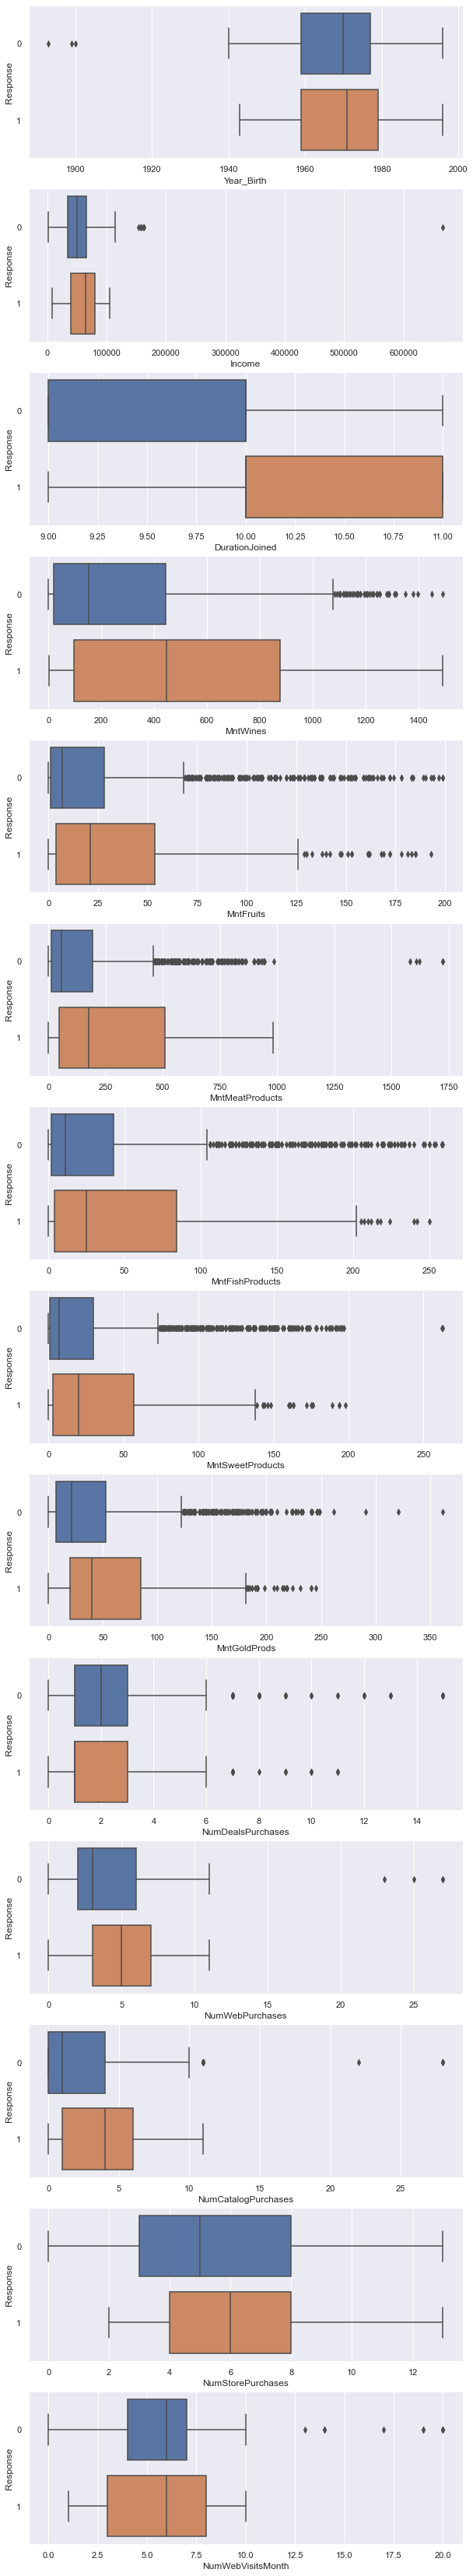

In [150]:
# Draw the distributions of all variables

f, axes = plt.subplots(14,1, figsize=(10, 60))
ConcatDF = pd.concat([NumericalCustomerData, Response], axis = 1).reindex(NumericalCustomerData.index)

count = 0
for var in NumericalCustomerData:
    sb.boxplot(x = ConcatDF[var], y = "Response", data = CustomerData, orient = "h",ax = axes[count])
    count += 1

In [156]:
CustomerData = CustomerData.sort_values(by=['DurationJoined'], key=lambda x: x.map({'9': 1, '10': 2, '11': 3}))
print("The different categories for Duration Joined are:", end=" ")
print(pd.unique(CustomerData["DurationJoined"]))
print(CustomerData['DurationJoined'].value_counts())
print("The different categories for Education are:", end=" ")
print(pd.unique(CustomerData["Education"]))
print(CustomerData['Education'].value_counts())
print("")
print("The different categories for Marital Status are:", end=" ")
print(pd.unique(CustomerData["Marital_Status"]))
print(CustomerData['Marital_Status'].value_counts())
print("")
print("The different categories for Kidhome are:", end=" ")
print(pd.unique(CustomerData["Kidhome"]))
print(CustomerData['Kidhome'].value_counts())
print("")
print("The different categories for Teenhome are:", end=" ")
print(pd.unique(CustomerData["Teenhome"]))
print(CustomerData['Teenhome'].value_counts())
print("")

The different categories for Duration Joined are: [11  9 10]
10    1189
9      557
11     494
Name: DurationJoined, dtype: int64
The different categories for Education are: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

The different categories for Marital Status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

The different categories for Kidhome are: [0 1 2]
0    1293
1     899
2      48
Name: Kidhome, dtype: int64

The different categories for Teenhome are: [0 1 2]
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64



In [152]:
CategoricalCustomerData = pd.DataFrame(CustomerData[["Education", "Marital_Status", "Kidhome", "Teenhome", 'Complain', "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]])
CategoricalCustomerData = CategoricalCustomerData[CategoricalCustomerData['Marital_Status'] != 'Absurd']
CategoricalCustomerData = CategoricalCustomerData[CategoricalCustomerData['Marital_Status'] != 'YOLO']
CategoricalCustomerData['Marital_Status'] = CategoricalCustomerData['Marital_Status'].replace(['Single', 'Alone'], 'Single')

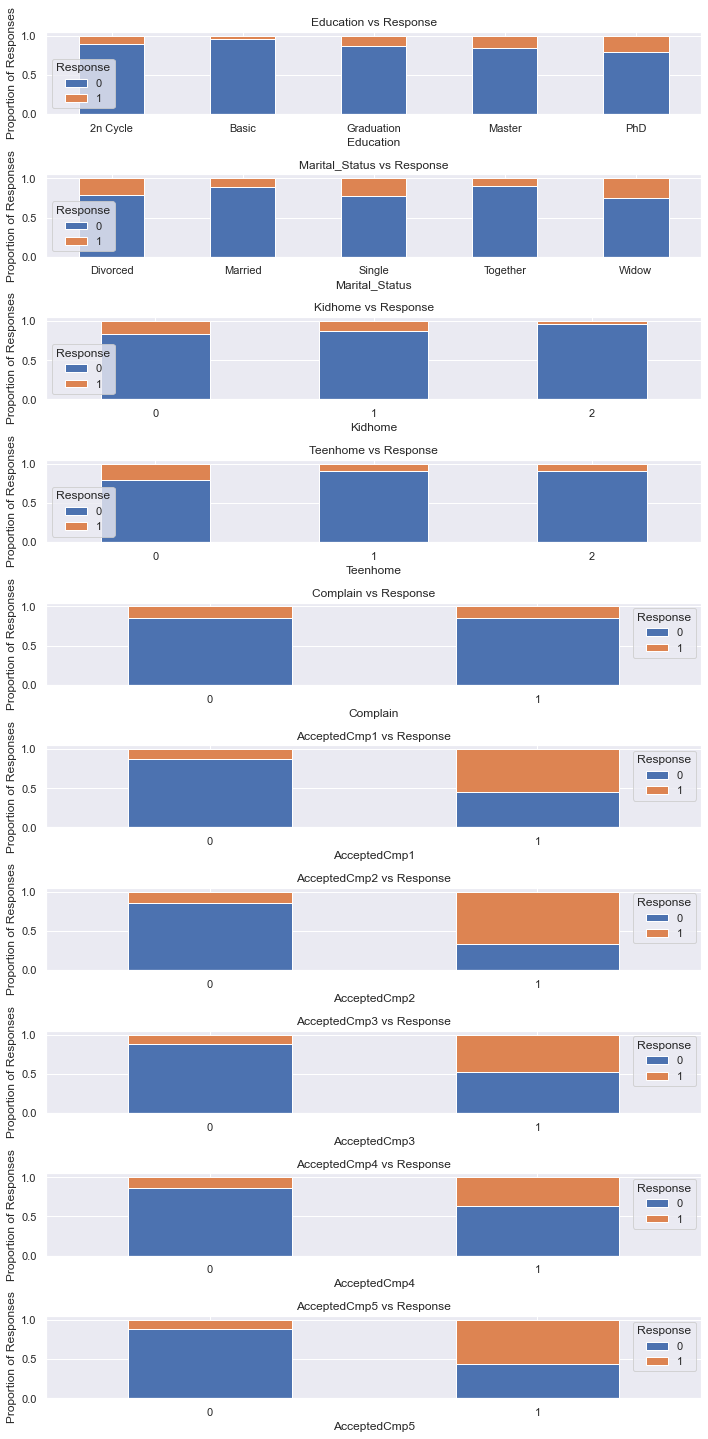

In [155]:
# Create a grid of subplots with 2 columns and n/2 rows, where n is the number of categorical variables
fig, axs = plt.subplots(len(CategoricalCustomerData.columns)//2, 2, figsize=(10, 20))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterate over the categorical variables and plot each normalized contingency table on a separate subplot
for i, col in enumerate(CategoricalCustomerData.columns):
    
    # Create a normalized contingency table of the column and the "Response" variable
    contingency_table = pd.crosstab(CategoricalCustomerData[col], Response["Response"], normalize='index')
    
    # Plot the bar graph on the appropriate subplot, using red and green for "No" and "Yes" responses
    contingency_table.plot(kind='bar', ax=axs[i],stacked=True)
    
    # Set the title and labels for the subplot
    axs[i].set_title(f"{col} vs Response")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Proportion of Responses")
    
    axs[i].tick_params(axis='x', rotation=0)

# Display the subplots
plt.tight_layout()
plt.show()